<a href="https://colab.research.google.com/github/venegaso/Proyecto-Pandas---Energ-a/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problema:**
Una extrusora de la empresa XXXXX produce varias referencias de producto y se desea obtener un modelo de producto extruido y se dese a obtener un modelo confiable de variación del consumo de energía en la extrusora con la producción realizada. Los datos obtenidos de consumo de energía eléctrica y la producción realizada para las diferentes referencias son las siguientes:

#**Objetivo del negocio:**
Una empresa productora de piezas plásticas inyectadas posee veinte maquinas y debido a los incrementos que se están dando en la dinámica energética mundial tiene demasiados costos en consumo de energía eléctrica, lo que impacta drásticamente en las finanzas del negocio.

#**Objetivo del proyecto:**
Por medio del modelamiento de datos de consumo energético de una inyectora se desea encontrar un modelo que facilite tomar decisiones prácticas para reducir el consumo de energía sin desmejorar la producción.

#**Planeación del proyecto:** 
Con los datos que se tienen de producción de una inyectora durante cierta cantidad de sesiones de fabricación se va a encontrar una línea base de consumo energético y aplicando los métodos estadísticos apropiados se obtendrá una línea meta con los datos mas favorables que permitan hacer los cambios operativos necesarios para disminuir el consumo de energía.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [108]:
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [109]:
data = pd.read_excel('BasePrincipal.xlsx')
data.isnull
data.dropna #elimina valores nulos
data.drop_duplicates #eliminar datos duplicados

<bound method DataFrame.drop_duplicates of     Referencia  Producción (Ton/Día)  Consumo (KWh/Día)
0        OC125                 12.36            2785.68
1        OC125                 14.53            2983.19
2        OC125                 14.37            2938.34
3        OC125                 14.30            2920.75
4        OC125                 16.00            3134.75
..         ...                   ...                ...
164     OC125A                 12.81            2368.16
165     OC125A                 12.84            2369.95
166     OC125A                 12.93            2361.15
167     OC125A                 12.93            2379.25
168     OC125A                 12.88            2383.43

[169 rows x 3 columns]>

In [110]:
sns.get_dataset_names()
sns.set(rc = {'figure.figsize' :( 7, 7 ),  
               'axes.labelsize' : 12 })

In [111]:
data.head(200)

,Referencia,Producción (Ton/Día),Consumo (KWh/Día)
0,OC125,12.36,2785.68
1,OC125,14.53,2983.19
2,OC125,14.37,2938.34
3,OC125,14.30,2920.75
4,OC125,16.00,3134.75
...,...,...,...
164,OC125A,12.81,2368.16
165,OC125A,12.84,2369.95
166,OC125A,12.93,2361.15
167,OC125A,12.93,2379.25


Se obtiene el número de datos que existen en la información tales como el tipo de referencia y la cantidad de datos que existen de la misma

In [112]:
data['Referencia'].value_counts()

OC125       115
OC1C27NT     40
OC125A       14
Name: Referencia, dtype: int64

# **Análisis de los datos**
# **Separación de los datos según su referencia:** 
Se separan en tres grupos y se debe analizar de manera diferente, ya que son tres productos diferentes y el consumo de energía es diferente. En este caso se llamarán data1, data2, y data3, que se asociaran respectivamente a los datos que se evidencian en la línea anterior.

# **Datos de la referencia "OC125" (data1)**


In [113]:
data1 = data.copy()
data1 = data1.drop(data1[data1['Referencia']!='OC125'].index) 
data1.head()

,Referencia,Producción (Ton/Día),Consumo (KWh/Día)
0,OC125,12.36,2785.68
1,OC125,14.53,2983.19
2,OC125,14.37,2938.34
3,OC125,14.30,2920.75
4,OC125,16.00,3134.75


In [114]:
data1['Referencia'].value_counts()

OC125    115
Name: Referencia, dtype: int64

In [115]:
data1['Consumo (KWh/Día)'].std()

290.4482308446869

In [116]:
data1['Consumo (KWh/Día)'].mean() 

2871.9202608695655

In [117]:
pend1, interc1, corr1, p_valor1, error_std1 = stats.linregress(data1['Producción (Ton/Día)'], data1['Consumo (KWh/Día)'])

print(f"pend1 = {pend1:10f}")
print(f"interc1 = {interc1:10f}")
print(f"corr1 = {corr1:10f}")
print(f"p_valor1 = {p_valor1:10f}")
print(f"error_std1 = {error_std1:10f}")

pend1 = 112.667082
interc1 = 1299.362114
corr1 =   0.845639
p_valor1 =   0.000000
error_std1 =   6.689828


In [118]:
CorrPearson1 = data1['Consumo (KWh/Día)'].corr(data1['Producción (Ton/Día)'], method='pearson')
CorrPearson1

0.8456390172749558

In [119]:
Norm1 = (data1['Consumo (KWh/Día)'] - data1['Consumo (KWh/Día)'].mean())/data1['Consumo (KWh/Día)'].std()

In [120]:
data1['Normalización 1'] = Norm1
data1.head(200)

,Referencia,Producción (Ton/Día),Consumo (KWh/Día),Normalización 1
0,OC125,12.36,2785.68,-0.296921
1,OC125,14.53,2983.19,0.383097
2,OC125,14.37,2938.34,0.228680
3,OC125,14.30,2920.75,0.168119
4,OC125,16.00,3134.75,0.904911
...,...,...,...,...
110,OC125,15.42,3131.73,0.894513
111,OC125,15.60,3123.22,0.865214
112,OC125,15.03,3063.50,0.659600
113,OC125,14.59,3047.04,0.602929


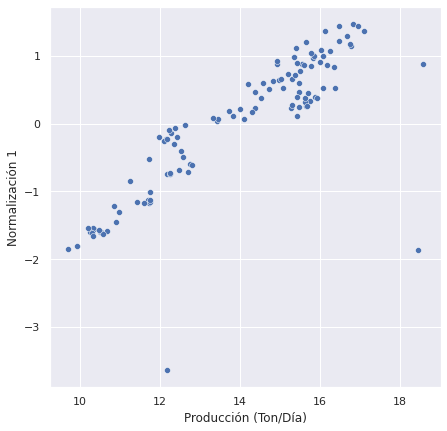

In [121]:
sns.scatterplot(data=data1, x = "Producción (Ton/Día)", y = "Normalización 1")

In [122]:
data1 = data1.drop(data1[data1['Normalización 1'] <= -1.8].index)
data1 = data1.drop(data1[data1['Producción (Ton/Día)'] >= 18].index)
data1.head(115)

,Referencia,Producción (Ton/Día),Consumo (KWh/Día),Normalización 1
0,OC125,12.36,2785.68,-0.296921
1,OC125,14.53,2983.19,0.383097
2,OC125,14.37,2938.34,0.228680
3,OC125,14.30,2920.75,0.168119
4,OC125,16.00,3134.75,0.904911
...,...,...,...,...
110,OC125,15.42,3131.73,0.894513
111,OC125,15.60,3123.22,0.865214
112,OC125,15.03,3063.50,0.659600
113,OC125,14.59,3047.04,0.602929


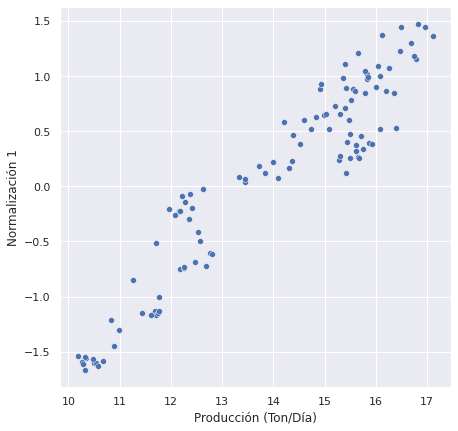

In [123]:

sns.scatterplot(data=data1, x = "Producción (Ton/Día)", y = "Normalización 1")

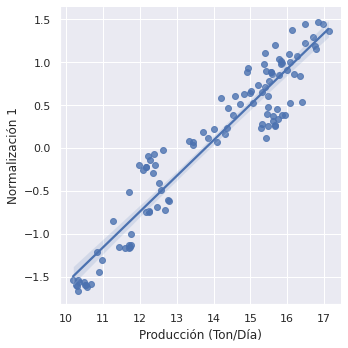

In [124]:
sns.lmplot( x = "Producción (Ton/Día)", y = "Normalización 1", data=data1, palette='viridis');

# **Datos de la Referencia "OC1C27NT" (data2)**

In [125]:
data2 = data.copy()
data2 = data2.drop(data2[data2['Referencia']!='OC1C27NT'].index)
data2.head()

,Referencia,Producción (Ton/Día),Consumo (KWh/Día)
115,OC1C27NT,12.76,2820.57
116,OC1C27NT,12.31,2800.93
117,OC1C27NT,13.12,2946.14
118,OC1C27NT,15.28,3101.02
119,OC1C27NT,15.08,3192.60


In [126]:
data2['Referencia'].value_counts()

OC1C27NT    40
Name: Referencia, dtype: int64

In [127]:
data2['Consumo (KWh/Día)'].mean() 

2839.0115

In [128]:
data2['Consumo (KWh/Día)'].std()

199.6175849166318

In [129]:
CorrPearson2 = data2['Consumo (KWh/Día)'].corr(data2['Producción (Ton/Día)'], method='pearson')
CorrPearson2

0.7376508100750416

In [130]:
pend2, interc2, corr2, p_valor2, error_std2 = stats.linregress(data2['Producción (Ton/Día)'], data2['Consumo (KWh/Día)'])

print(f"pend2 = {pend2:10f}")
print(f"interc2 = {interc2:10f}")
print(f"corr2 = {corr2:10f}")
print(f"p_valor2 = {p_valor2:10f}")
print(f"error_std2 = {error_std2:10f}")

pend2 = 123.283468
interc2 = 1219.282474
corr2 =   0.737651
p_valor2 =   0.000000
error_std2 =  18.305573


In [131]:
Norm2 = (data2['Consumo (KWh/Día)'] - data2['Consumo (KWh/Día)'].mean())/data2['Consumo (KWh/Día)'].std()

In [132]:
data2['Normalización 2'] = Norm2

In [133]:
data2 = data2.drop(data2[data2['Normalización 2'] <= -1.8].index)
data2 = data2.drop(data2[data2['Producción (Ton/Día)'] <= 10.6].index)

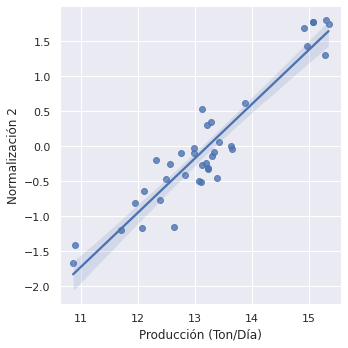

In [134]:
sns.lmplot( x = "Producción (Ton/Día)", y = "Normalización 2", data=data2, palette='viridis');

# **Datos de referencia "OC125A" (data3)**

In [135]:
data3 = data.copy()
data3 = data3.drop(data3[data3['Referencia']!='OC125A'].index)
data3.head()

,Referencia,Producción (Ton/Día),Consumo (KWh/Día)
155,OC125A,14.04,2500.12
156,OC125A,13.04,2379.39
157,OC125A,13.22,2383.46
158,OC125A,13.07,2371.31
159,OC125A,13.25,2410.46


In [136]:
data3['Referencia'].value_counts()

OC125A    14
Name: Referencia, dtype: int64

Datos de estadistica descriptiva para la tabla 1 que contiene los datos de la referencia 'OC125'

In [137]:
data3['Consumo (KWh/Día)'].mean()

2403.3907142857142

In [138]:
data3['Consumo (KWh/Día)'].std()

46.78841218544569

In [139]:
CorrPearson3 = data3['Consumo (KWh/Día)'].corr(data3['Producción (Ton/Día)'], method='pearson')
CorrPearson3

0.9595927880795992

In [140]:
pend3, interc3, corr3, p_valor3, error_std3 = stats.linregress(data3['Producción (Ton/Día)'], data3['Consumo (KWh/Día)'])

print(f"pend3 = {pend3:10f}")
print(f"interc3 = {interc3:10f}")
print(f"corr3 = {corr3:10f}")
print(f"p_valor3 = {p_valor3:10f}")
print(f"error_std3 = {error_std3:10f}")

pend3 = 109.965942
interc3 = 951.918829
corr3 =   0.959593
p_valor3 =   0.000000
error_std3 =   9.308784


In [141]:
Norm3 = (data3['Consumo (KWh/Día)'] - data3['Consumo (KWh/Día)'].mean())/data3['Consumo (KWh/Día)'].std()

In [142]:
data3['Normalización 3'] = Norm3

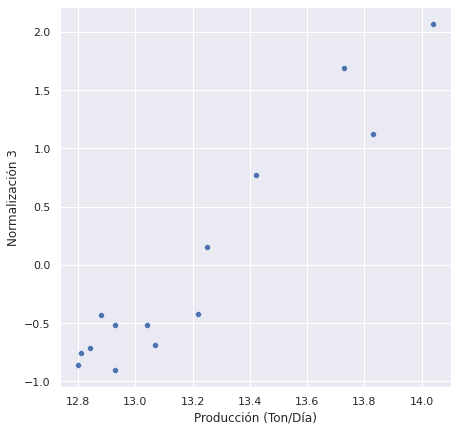

In [143]:
sns.scatterplot(data=data3, x = "Producción (Ton/Día)", y = "Normalización 3")

In [144]:
data3 = data3.drop(data3[data3['Normalización 3'] <= -1.8].index)
data3 = data3.drop(data3[data3['Producción (Ton/Día)'] >= 18].index)

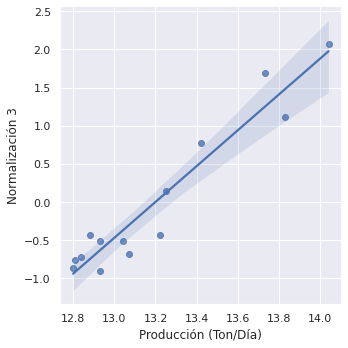

In [145]:
sns.lmplot( x = "Producción (Ton/Día)", y = "Normalización 3", data=data3);

# **Agrupamiento de datos modificados**
Se agrupan los datos analizados por separados en una nueva tabla, el propósito de esta es lograr generar un modelo que unifique los tres productos y poder tener una línea base común.

In [146]:
dataFinal = pd.concat([data1, data2, data3], axis=0)
dataFinal

,Referencia,Producción (Ton/Día),Consumo (KWh/Día),Normalización 1,Normalización 2,Normalización 3
0,OC125,12.36,2785.68,-0.296921,NaN,NaN
1,OC125,14.53,2983.19,0.383097,NaN,NaN
2,OC125,14.37,2938.34,0.228680,NaN,NaN
3,OC125,14.30,2920.75,0.168119,NaN,NaN
4,OC125,16.00,3134.75,0.904911,NaN,NaN
...,...,...,...,...,...,...
164,OC125A,12.81,2368.16,NaN,NaN,-0.752979
165,OC125A,12.84,2369.95,NaN,NaN,-0.714722
166,OC125A,12.93,2361.15,NaN,NaN,-0.902803
167,OC125A,12.93,2379.25,NaN,NaN,-0.515955


Una vez analizados los datos por separado y concatenados en una nueva tabla, se compara la data original contra la nueva data analizada y modificada, esto con el propósito de mostrar la diferencia cuando se depura la información de datos que podría alterar el resultado que se busca.

In [147]:
dataFinal = dataFinal.drop(['Normalización 1','Normalización 2', 'Normalización 3'], axis = 'columns')
dataFinal

,Referencia,Producción (Ton/Día),Consumo (KWh/Día)
0,OC125,12.36,2785.68
1,OC125,14.53,2983.19
2,OC125,14.37,2938.34
3,OC125,14.30,2920.75
4,OC125,16.00,3134.75
...,...,...,...
164,OC125A,12.81,2368.16
165,OC125A,12.84,2369.95
166,OC125A,12.93,2361.15
167,OC125A,12.93,2379.25


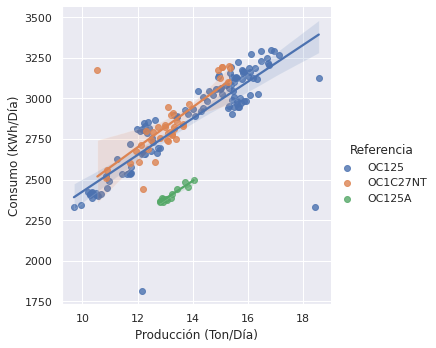

In [148]:
sns.lmplot(x='Producción (Ton/Día)', y='Consumo (KWh/Día)', data=data, hue='Referencia');

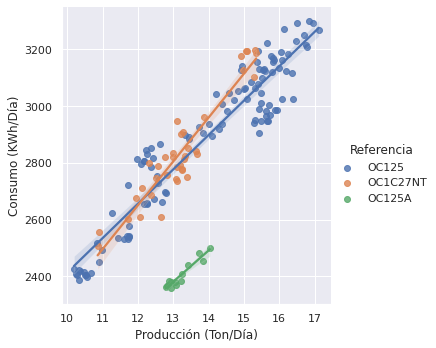

In [149]:
sns.lmplot(x='Producción (Ton/Día)', y='Consumo (KWh/Día)', data=dataFinal, hue='Referencia');

# **Ecuaciones matemáticas**

Se toma la ecuación de la recta para poder unificar la información y estandarizarla a un solo producto, y se realiza con el producto que más consumo tenia.

*   $$y_1 = m_1x + b_1$$
*   $$y_2 = m_2x + b_2$$
*   $$y_3 = m_3x + b_3$$


$$x_{1A} = (m_2x_2 + b_2 - b_1)/m_1$$
$$x_{1B} = (m_3x_3 + b_3 - b_1)/m_1$$

La aplicación de esta se aplica en las siguientes filas tanto para el producto dos como el producto tres.










In [150]:
data2["Producción (Ton/Día)"] = ((pend2 * data2['Producción (Ton/Día)'])+(interc2-interc1))/pend1
data2.head()

,Referencia,Producción (Ton/Día),Consumo (KWh/Día),Normalización 2
115,OC1C27NT,13.251585,2820.57,-0.092384
116,OC1C27NT,12.759182,2800.93,-0.190772
117,OC1C27NT,13.645507,2946.14,0.536669
118,OC1C27NT,16.009039,3101.02,1.312552
119,OC1C27NT,15.790194,3192.60,1.771329


Se realiza la depuración de la información que no se necesita y que podria entorpecer y confundir el proceso

In [151]:
data2 = data2.drop(['Normalización 2'], axis = 'columns')
data2.head()

,Referencia,Producción (Ton/Día),Consumo (KWh/Día)
115,OC1C27NT,13.251585,2820.57
116,OC1C27NT,12.759182,2800.93
117,OC1C27NT,13.645507,2946.14
118,OC1C27NT,16.009039,3101.02
119,OC1C27NT,15.790194,3192.60


In [152]:
dataFinal = dataFinal.drop(dataFinal[dataFinal['Referencia'] == "OC1C27NT"].index)
dataFinal.head(200)

,Referencia,Producción (Ton/Día),Consumo (KWh/Día)
0,OC125,12.36,2785.68
1,OC125,14.53,2983.19
2,OC125,14.37,2938.34
3,OC125,14.30,2920.75
4,OC125,16.00,3134.75
...,...,...,...
164,OC125A,12.81,2368.16
165,OC125A,12.84,2369.95
166,OC125A,12.93,2361.15
167,OC125A,12.93,2379.25


In [153]:
dataFinal = pd.concat([dataFinal, data2], axis=0)
dataFinal.head(200)

,Referencia,Producción (Ton/Día),Consumo (KWh/Día)
0,OC125,12.360000,2785.68
1,OC125,14.530000,2983.19
2,OC125,14.370000,2938.34
3,OC125,14.300000,2920.75
4,OC125,16.000000,3134.75
...,...,...,...
150,OC1C27NT,12.496568,2607.73
151,OC1C27NT,12.540337,2711.09
152,OC1C27NT,11.216321,2558.20
153,OC1C27NT,14.477120,2962.18


In [154]:
data3["Producción (Ton/Día)"] = ((pend3 * data3['Producción (Ton/Día)'])+(interc3-interc1))/pend1
data3.head()

,Referencia,Producción (Ton/Día),Consumo (KWh/Día),Normalización 3
155,OC125A,10.619593,2500.12,2.067377
156,OC125A,9.643567,2379.39,-0.512963
157,OC125A,9.819252,2383.46,-0.425975
158,OC125A,9.672848,2371.31,-0.685655
159,OC125A,9.848533,2410.46,0.151091


In [155]:
data3 = data3.drop(['Normalización 3'], axis = 'columns')
data3.head()

,Referencia,Producción (Ton/Día),Consumo (KWh/Día)
155,OC125A,10.619593,2500.12
156,OC125A,9.643567,2379.39
157,OC125A,9.819252,2383.46
158,OC125A,9.672848,2371.31
159,OC125A,9.848533,2410.46


In [156]:
dataFinal = dataFinal.drop(dataFinal[dataFinal['Referencia'] == "OC125A"].index)
dataFinal.head(200)

,Referencia,Producción (Ton/Día),Consumo (KWh/Día)
0,OC125,12.360000,2785.68
1,OC125,14.530000,2983.19
2,OC125,14.370000,2938.34
3,OC125,14.300000,2920.75
4,OC125,16.000000,3134.75
...,...,...,...
150,OC1C27NT,12.496568,2607.73
151,OC1C27NT,12.540337,2711.09
152,OC1C27NT,11.216321,2558.20
153,OC1C27NT,14.477120,2962.18


In [157]:
dataFinal = pd.concat([dataFinal, data3], axis=0)
dataFinal.head(200)

,Referencia,Producción (Ton/Día),Consumo (KWh/Día)
0,OC125,12.360000,2785.68
1,OC125,14.530000,2983.19
2,OC125,14.370000,2938.34
3,OC125,14.300000,2920.75
4,OC125,16.000000,3134.75
...,...,...,...
164,OC125A,9.419082,2368.16
165,OC125A,9.448362,2369.95
166,OC125A,9.536205,2361.15
167,OC125A,9.536205,2379.25


In [158]:
dataFinal["Referencia Estandarizada"] = "Produccion Estandarizada"
dataFinal.head()

,Referencia,Producción (Ton/Día),Consumo (KWh/Día),Referencia Estandarizada
0,OC125,12.36,2785.68,Produccion Estandarizada
1,OC125,14.53,2983.19,Produccion Estandarizada
2,OC125,14.37,2938.34,Produccion Estandarizada
3,OC125,14.30,2920.75,Produccion Estandarizada
4,OC125,16.00,3134.75,Produccion Estandarizada


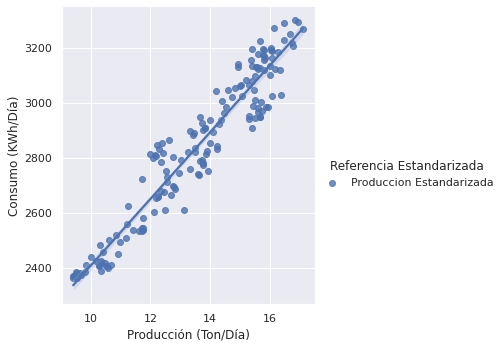

In [159]:
sns.lmplot(x='Producción (Ton/Día)', y='Consumo (KWh/Día)', data=dataFinal, hue='Referencia Estandarizada');

In [160]:
pendFinBase, intercFinBase, corrFinBase, p_valorFinBase, error_stdFinBase = stats.linregress(dataFinal['Producción (Ton/Día)'], dataFinal['Consumo (KWh/Día)'])

print(f"pendFinalBase = {pendFinBase:10f}")
print(f"intercFinalBase = {intercFinBase:10f}")
print(f"corrFinalBase = {corrFinBase:10f}")
print(f"p_valorFinalBase = {p_valorFinBase:10f}")
print(f"error_stdFinalBase = {error_stdFinBase:10f}")

pendFinalBase = 121.229939
intercFinalBase = 1195.124769
corrFinalBase =   0.959068
p_valorFinalBase =   0.000000
error_stdFinalBase =   2.829804


In [161]:
dataFinal["Consumo Base"] = pendFinBase * dataFinal['Producción (Ton/Día)'] + intercFinBase
dataFinal

,Referencia,Producción (Ton/Día),Consumo (KWh/Día),Referencia Estandarizada,Consumo Base
0,OC125,12.360000,2785.68,Produccion Estandarizada,2693.526810
1,OC125,14.530000,2983.19,Produccion Estandarizada,2956.595777
2,OC125,14.370000,2938.34,Produccion Estandarizada,2937.198987
3,OC125,14.300000,2920.75,Produccion Estandarizada,2928.712891
4,OC125,16.000000,3134.75,Produccion Estandarizada,3134.803786
...,...,...,...,...,...
164,OC125A,9.419082,2368.16,Produccion Estandarizada,2336.999442
165,OC125A,9.448362,2369.95,Produccion Estandarizada,2340.549147
166,OC125A,9.536205,2361.15,Produccion Estandarizada,2351.198263
167,OC125A,9.536205,2379.25,Produccion Estandarizada,2351.198263


In [162]:
dataFinal = dataFinal.drop(dataFinal[dataFinal['Consumo (KWh/Día)'] > dataFinal['Consumo Base']].index)

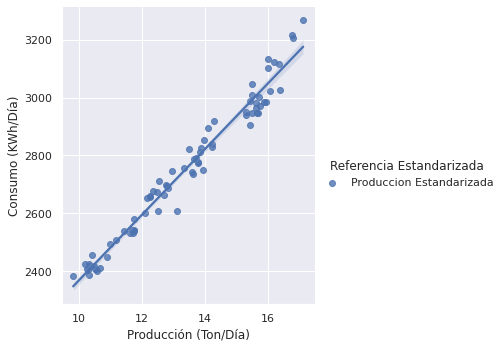

In [163]:
sns.lmplot(x='Producción (Ton/Día)', y='Consumo (KWh/Día)', data=dataFinal, hue='Referencia Estandarizada');

In [164]:
pendFinMeta, intercFinMeta, corrFinMeta, p_valorFinMeta, error_stdFinMeta = stats.linregress(dataFinal['Producción (Ton/Día)'], dataFinal['Consumo (KWh/Día)'])

print(f"pendFinal = {pendFinMeta:10f}")
print(f"intercFinal = {intercFinMeta:10f}")
print(f"corrFinal = {corrFinMeta:10f}")
print(f"p_valorFinal = {p_valorFinMeta:10f}")
print(f"error_stdFinal = {error_stdFinMeta:10f}")

pendFinal = 113.571981
intercFinal = 1231.849787
corrFinal =   0.985008
p_valorFinal =   0.000000
error_stdFinal =   2.296757


In [165]:
dataFinal['Variacion Consumo Energia'] = dataFinal['Consumo Base'] - dataFinal['Consumo (KWh/Día)']
dataFinal

,Referencia,Producción (Ton/Día),Consumo (KWh/Día),Referencia Estandarizada,Consumo Base,Variacion Consumo Energia
3,OC125,14.300000,2920.75,Produccion Estandarizada,2928.712891,7.962891
4,OC125,16.000000,3134.75,Produccion Estandarizada,3134.803786,0.053786
7,OC125,17.120000,3267.77,Produccion Estandarizada,3270.581318,2.811318
13,OC125,12.170000,2654.40,Produccion Estandarizada,2670.493122,16.093122
14,OC125,12.470000,2673.38,Produccion Estandarizada,2706.862103,33.482103
...,...,...,...,...,...,...
148,OC1C27NT,12.967086,2745.53,Produccion Estandarizada,2767.123775,21.593775
150,OC1C27NT,12.496568,2607.73,Produccion Estandarizada,2710.082905,102.352905
151,OC1C27NT,12.540337,2711.09,Produccion Estandarizada,2715.389033,4.299033
157,OC125A,9.819252,2383.46,Produccion Estandarizada,2385.512080,2.052080



Se busca el mayor máximo entre la línea base y entre los puntos de consumo optimo con el propósito de encontrar una línea meta promedio que permita optimizar y reprogramar la producción para obtener ahorros de energía.


In [166]:
maximo = dataFinal['Variacion Consumo Energia'].max()
print("Valor máximo:",maximo)
ahorroPot = maximo/2
print("Ahorro Potencia:",ahorroPot)

Valor máximo: 177.21522083424907
Ahorro Potencia: 88.60761041712453


# **Conclusión**

1.   El Ahorro potencial promedio es 88.6 KWh por serie de producción, ese ahorro se puede dar por buenas practicas de manufactura o optimización en la ejecución del mantenimiento. 

2.   El ahorro maximo que se podria conseguir por serie de produccion es 177.215 KWh (Serie de producción: Fabricación de un pedido completo de piezas inyectadas)

